In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
df = pd.read_csv('data/raw/dataset_vk.csv')
df.info()

# political: <string>
# sex: 'male' | 'female'
# bdate: 'xx.xx' | 'xx.xx.xxxx' | 'not specified'
# city: <string> | 'NaN'
# country: <string> | 'NaN'
# education: 0
# occupation: 'university' | 'not specified' | 'work'
# relation: 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8
# military: 'specified' | 'not specified'
# people_main: <string> | 'not specified' | 'NaN'
# life_main: <string> | 'not specified' | 'NaN'
# activities: <string> | 'NaN'
# interests: <string> | 'NaN'
# music: <string> | 'NaN'
# movies: <string> | 'NaN'
# tv: <string> | 'NaN'
# books: <string> | 'NaN'
# about: <string> | 'NaN'
# inspired_by: <string> | 'NaN'
# religion: <string> | 'NaN'
# posts: [<string> | '']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   political    10123 non-null  object
 1   sex          10123 non-null  object
 2   bdate        10123 non-null  object
 3   city         9660 non-null   object
 4   country      9924 non-null   object
 5   education    10123 non-null  int64 
 6   occupation   10123 non-null  object
 7   relation     10123 non-null  int64 
 8   military     10123 non-null  object
 9   people_main  4180 non-null   object
 10  life_main    4125 non-null   object
 11  activities   4817 non-null   object
 12  interests    5815 non-null   object
 13  music        5647 non-null   object
 14  movies       5572 non-null   object
 15  tv           4141 non-null   object
 16  books        5317 non-null   object
 17  about        5026 non-null   object
 18  inspired_by  1503 non-null   object
 19  religion     5597 non-nul

In [3]:
# читаемый вид

# political: <string>
# sex: 'male' | 'female'
# bdate: 'xx.xx' | 'xx.xx.xxxx' | 'not specified'
# city: <string> | 'not specified'
# country: <string> | 'not specified'
# occupation: 'university' | 'work' | 'not specified'
# relation: 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8
# military: 'specified' | 'not specified'
# people_main: <string> | 'not specified'
# life_main: <string> | 'not specified'
# activities: <string> | 'not specified'
# interests: <string> | 'not specified'
# music: <string> | 'not specified'
# movies: <string> | 'not specified'
# tv: <string> | 'not specified'
# books: <string> | 'not specified'
# about: <string> | 'not specified'
# inspired_by: <string> | 'not specified'
# religion: <string> | 'not specified'
# posts: <number>
# filled: <number>

# fill empty
df.fillna('not specified', inplace=True)

# convert posts to list of lengths of nonEmpty posts
posts_num = df.posts.apply(eval).apply(
    lambda lst: list(map(len, filter(lambda e: e != '', lst))))

# create new column quantity of filled fields (without posts, education)
filled_num = df.apply(lambda row: len(list(filter(lambda s: s != 'not specified', row))) - 2, axis=1)

# convert dates to proper format
def validate(d):
    da = d.split('.')
    complete = lambda s: s if len(s) == 2 else '0' + s
    return complete(da[0]) + '.' + complete(da[1])
dates = df.bdate.apply(lambda d: d if d == 'not specified' else validate(d))

df = df.assign(posts = lambda frame: posts_num,
               filled = lambda frame: filled_num,
               bdate = lambda frame: dates)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   political    10123 non-null  object
 1   sex          10123 non-null  object
 2   bdate        10123 non-null  object
 3   city         10123 non-null  object
 4   country      10123 non-null  object
 5   education    10123 non-null  int64 
 6   occupation   10123 non-null  object
 7   relation     10123 non-null  int64 
 8   military     10123 non-null  object
 9   people_main  10123 non-null  object
 10  life_main    10123 non-null  object
 11  activities   10123 non-null  object
 12  interests    10123 non-null  object
 13  music        10123 non-null  object
 14  movies       10123 non-null  object
 15  tv           10123 non-null  object
 16  books        10123 non-null  object
 17  about        10123 non-null  object
 18  inspired_by  10123 non-null  object
 19  religion     10123 non-nu

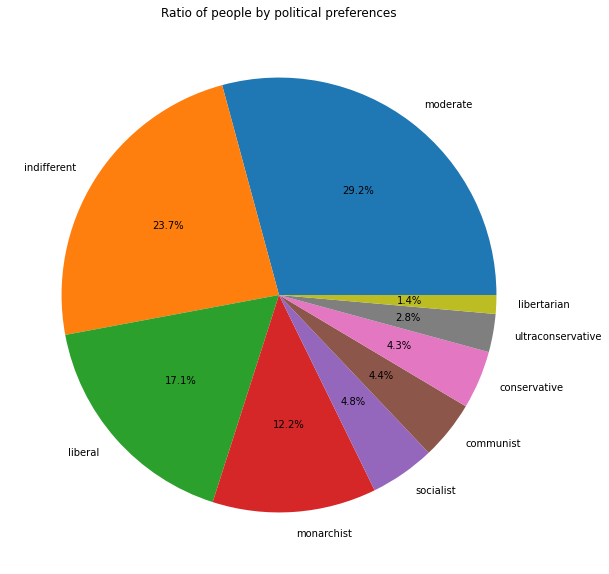

In [4]:
# количество людей по политическим убеждениями
data = df.political.value_counts()

plt.pie(data.tolist(), labels=data.index, autopct='%1.1f%%')
plt.title('Ratio of people by political preferences')

plt.show()

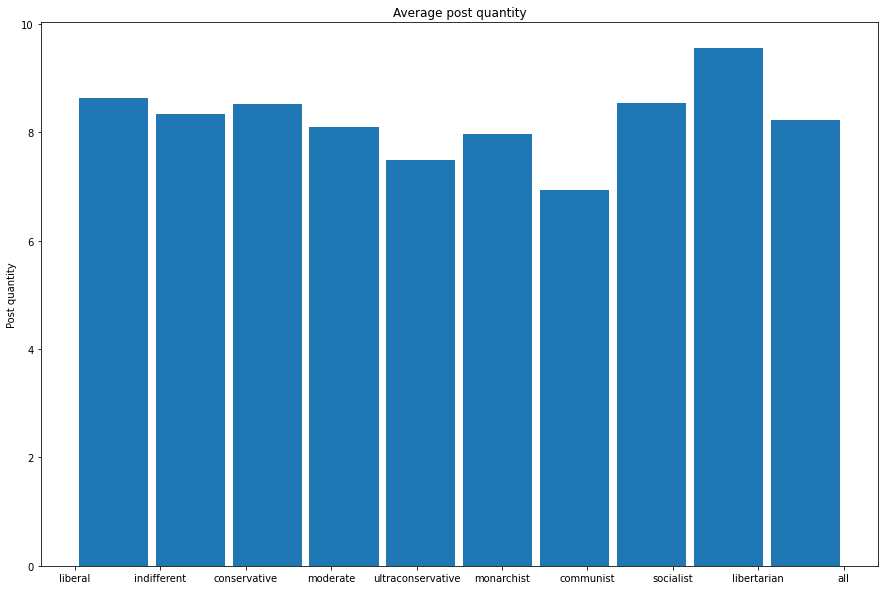

In [5]:
# среднее количество постов среди людей с различными политическими убеждениями
x = df.political.unique().tolist()
weights = list(map(lambda name: df[df.political == name].posts.apply(len).mean(), x))

x.append('all')
weights.append(df.posts.apply(len).mean())

plt.hist(x=x, weights=weights, rwidth=0.9)
plt.title('Average post quantity')
plt.ylabel('Post quantity')

plt.show()

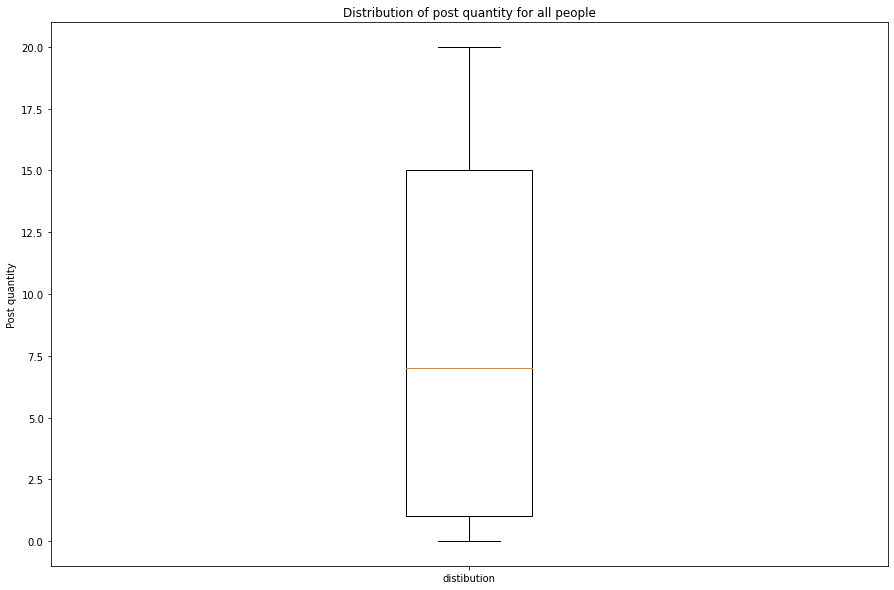

In [6]:
# распределение количества постов среди всех людей
posts = df.posts.apply(len).tolist()

plt.boxplot(posts, labels=['distibution'])
plt.title('Distribution of post quantity for all people')
plt.ylabel('Post quantity')

plt.show()

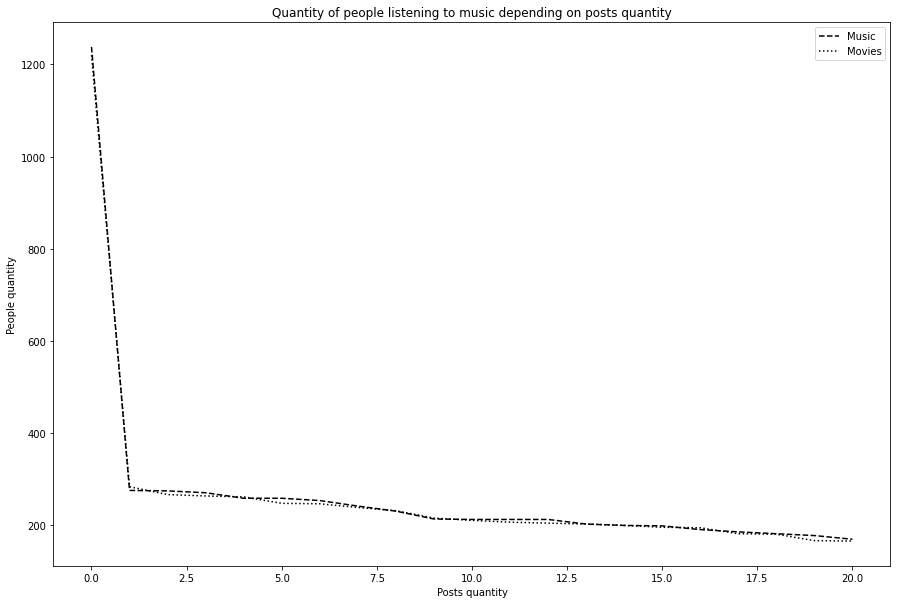

In [7]:
# количество людей которые слушают музыку, смотрят фильмы в зависимости от количества постов
music = df[df.music != 'not specified'].posts.apply(len).value_counts().tolist()
movies = df[df.movies != 'not specified'].posts.apply(len).value_counts().tolist()

plt.plot(music, 'k--')
plt.plot(movies, 'k:')
plt.title('Quantity of people listening to music depending on posts quantity')
plt.xlabel('Posts quantity')
plt.ylabel('People quantity')
plt.legend(['Music', 'Movies'])

plt.show()

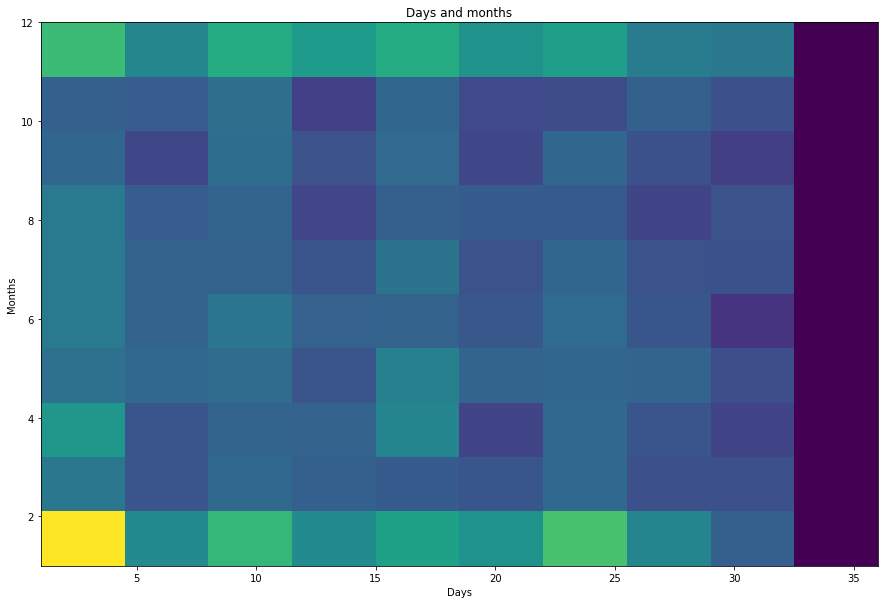

In [8]:
# самые частые выборы дат
data = df[df.bdate != 'not specified'].bdate
day, month = zip(*map(lambda d: d.split('.'), data))
day = list(map(int, day))
month = list(map(int, month))

plt.hist2d(day, month)
plt.title('Days and months')
plt.xlabel('Days')
plt.ylabel('Months')

plt.show()

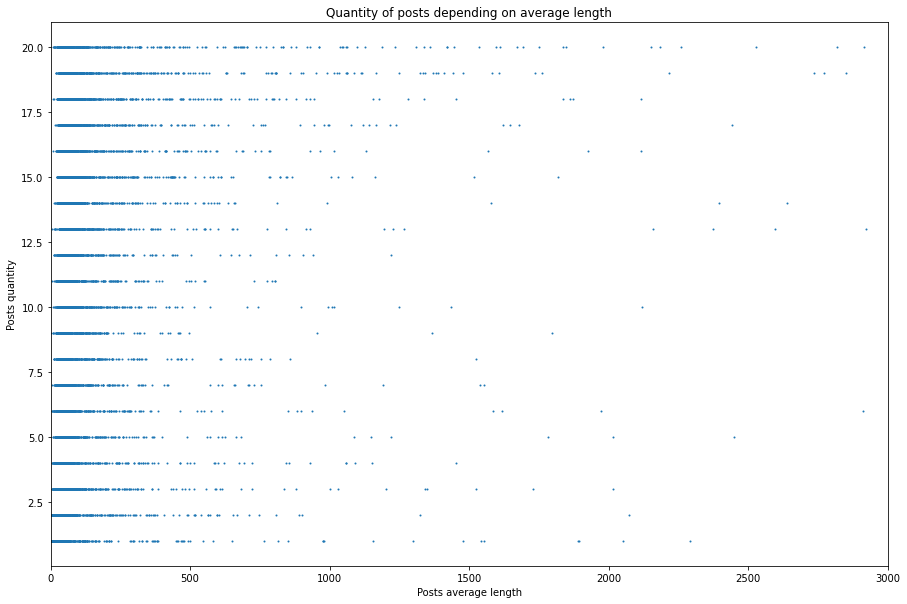

In [9]:
# Количество постов от средней длины у каждого человека
# Берем только людей с ненулевым количеством постов

not_empty = filter(lambda x: len(x) != 0, df.posts.tolist())

posts_avg_len, posts_num = zip(
    *map(lambda posts: (st.mean(posts), len(posts)),
         not_empty
        ))

plt.scatter(posts_avg_len, posts_num, s=1)
plt.title('Quantity of posts depending on average length')
plt.xlabel('Posts average length')
plt.ylabel('Posts quantity')
plt.xlim(0, 3000)

plt.show()

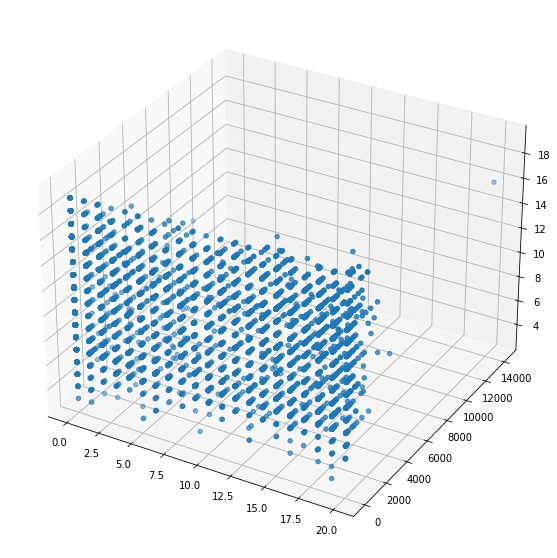

In [10]:
# График зависимости количества постов у человека от их средней длины и количества заполненных полей профиля
# опять берем людей с непустым количеством постов

posts_num, posts_avg_len, filled_fields_num = zip(
    *df[['posts', 'filled']].apply(lambda x: (0, 0, x.filled) 
                                             if len(x.posts) == 0 
                                             else (len(x.posts), st.mean(x.posts), x.filled), 
                                   axis=1).tolist())

ax = plt.axes(projection='3d')

ax.scatter(posts_num, posts_avg_len, filled_fields_num)

plt.show()

In [11]:
df.to_csv('data/processed/dataset_vk.csv')